# BANCOLOMBIA ACCIONES 2003-2013

In [1]:
import pandas as pd
import warnings
import rpy2
warnings.filterwarnings('ignore')

In [2]:
%load_ext rpy2.ipython

In [3]:
import plotly.graph_objects as go

def plot_(title, *series):
    # Crear una figura
    fig = go.Figure()

    # Agregar cada serie de datos al gráfico
    for x_variable, y_variable, label in series:
        fig.add_trace(go.Scatter(
            x=x_variable,
            y=y_variable,
            mode='lines',
            name=label,
            line=dict(width=2)
        ))

    # Actualizar el tipo de eje x a 'date'
    fig.update_xaxes(type='date')

    # Ajustar el título para que esté centrado
    fig.update_layout(title_text=title, title_x=0.5)

    # Personalizar el selector de rango de fechas
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="1d",
                         step="day",
                         stepmode="backward"),
                    dict(count=7,
                         label="1w",
                         step="day",
                         stepmode="backward"),
                    dict(count=1,
                         label="1m",
                         step="month",
                         stepmode="backward"),
                    dict(count=3,
                         label="3m",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6m",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1y",
                         step="year",
                         stepmode="backward"),
                    dict(count=2,
                         label="2y",
                         step="year",
                         stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            autorange=True,
            type="linear"
        )
    )

    # Personalizar los títulos de los ejes
    fig.update_layout(
        xaxis_title="Tiempo",
        yaxis_title="Precio en dolares"
    )

    # Personalizar la leyenda
    fig.update_layout(
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=-.35
        )
    )

    # Mostrar el gráfico
    fig.show()

# 0 Importación de datos


La elección de la base de datos que abarca el periodo 2000-01-01 a 2010-01-01 para analizar las acciones de Bancolombia se justifica por la exclusión del impacto de la pandemia mundial, permitiendo un enfoque claro en factores y tendencias previas a este suceso y la limitante de computo. La extensión temporal facilita la evaluación del comportamiento de las acciones, buscando determinar si siguen una caminata aleatoria, lo que es esencial para evaluar la eficacia de estrategias de inversión basadas en análisis histórico. Además, la serie temporal presenta irregularidades en la espaciación de los datos, lo que agrega complejidad al análisis y requiere adaptación en las técnicas utilizadas para tener en cuenta la variabilidad en la frecuencia de observaciones.

In [4]:
import yfinance as yf

ticker_name = 'BC'

data = yf.download(ticker_name, start='2003-06-01', end='2013-06-01')
print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed

(2518, 6)


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2003-06-02  22.080000  22.490000  22.049999  22.200001  16.651117  519800
2003-06-03  22.200001  22.480000  22.200001  22.400000  16.801130  327000
2003-06-04  22.370001  23.139999  22.370001  23.000000  17.251165  444100
2003-06-05  22.900000  23.240000  22.799999  23.150000  17.363667  394200
2003-06-06  25.010000  25.080000  24.100000  24.150000  18.113718  905600

In [5]:
df = pd.DataFrame()
df["Date"] = pd.to_datetime(data.index)
df["Close"] = data["Close"].values
display(df.head(10))
display(df.shape)

df_completo = df.copy()
df_completo.set_index('Date', inplace=True)
df_completo = df_completo.resample('1D').mean().ffill()
display(df_completo.head(10))
df_completo.shape

Date      Close
0 2003-06-02  22.200001
1 2003-06-03  22.400000
2 2003-06-04  23.000000
3 2003-06-05  23.150000
4 2003-06-06  24.150000
5 2003-06-09  24.540001
6 2003-06-10  24.660000
7 2003-06-11  25.120001
8 2003-06-12  25.090000
9 2003-06-13  25.170000

(2518, 2)

Close
Date                 
2003-06-02  22.200001
2003-06-03  22.400000
2003-06-04  23.000000
2003-06-05  23.150000
2003-06-06  24.150000
2003-06-07  24.150000
2003-06-08  24.150000
2003-06-09  24.540001
2003-06-10  24.660000
2003-06-11  25.120001

(3652, 1)

In [6]:
%R -i df

Además: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages


In [7]:
%%R
library(tidyverse)
library(fpp3)
library(lubridate)


df=df %>% 
  mutate(Date=ymd(Date)) %>% 
  as_tsibble(index = Date) %>%
  fill_gaps(.full=TRUE) %>%
  fill('Close', .direction = 'down')
head(df, 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# A tsibble: 10 x 2 [1D]
   Date       Close
   <date>     <dbl>
 1 2003-06-02  22.2
 2 2003-06-03  22.4
 3 2003-06-04  23  
 4 2003-06-05  23.1
 5 2003-06-06  24.1
 6 2003-06-07  24.1
 7 2003-06-08  24.1
 8 2003-06-09  24.5
 9 2003-06-10  24.7
10 2003-06-11  25.1


── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──
✔ tsibble     1.1.4     ✔ fable       0.3.3
✔ tsibbledata 0.4.1     ✔ fabletools  0.4.1
✔ feasts      0.3.1     
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()


In [8]:
plot_('Acciones Bancolombia', (df["Date"], df["Close"], "Close"))

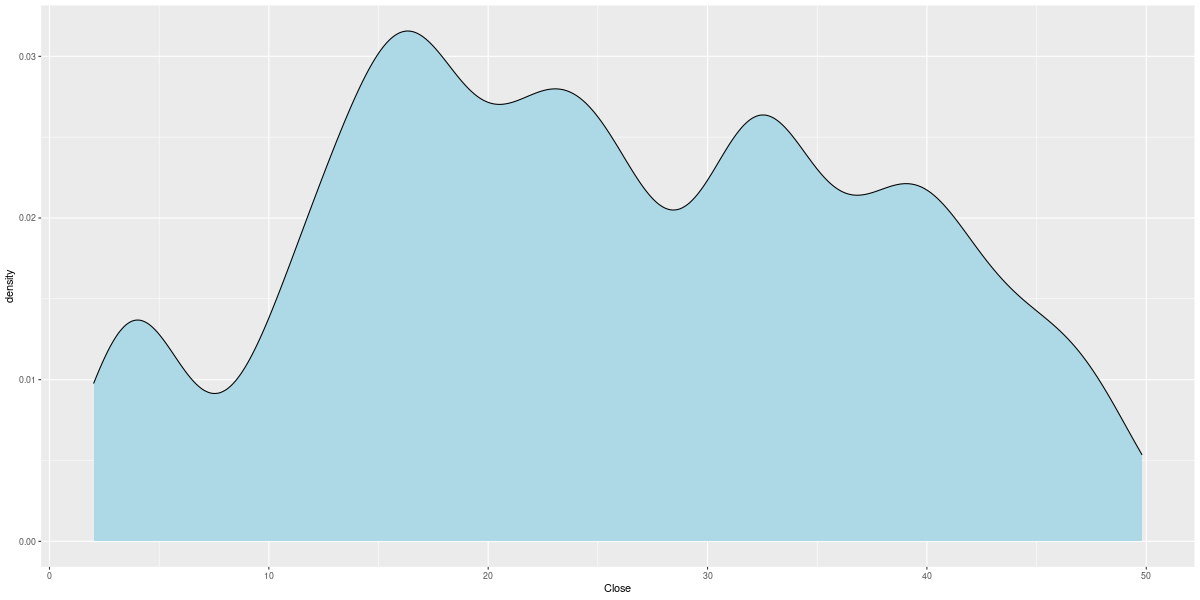

In [9]:
%%R -w 1200 -h 600
library(patchwork)
ggplot(df,aes(x=Close))+
  geom_density(fill="lightblue")

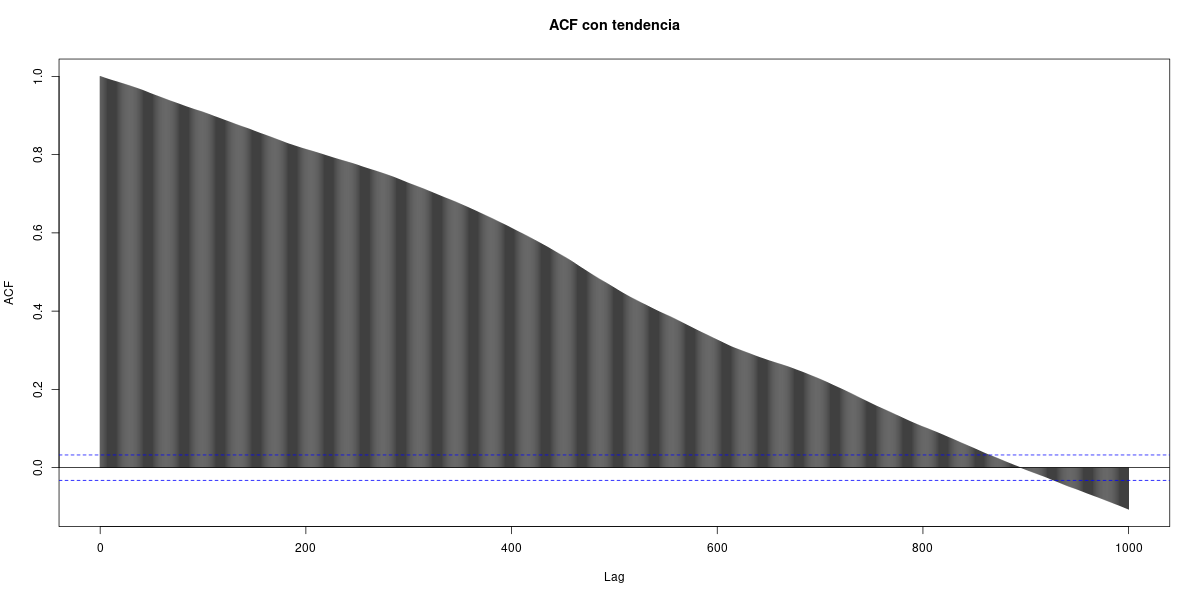

In [10]:
%%R  -w 1200 -h 600
acf(df$Close, lag.max = 1000, main = "ACF con tendencia")

# 1. Estabilizar varianza.

En esta sección se buscará una herramienta para estabilizar la varianza, siempre y cuando pareciera que no se encuentre estabilizada.

#### Familia de transformaciones Box-Cox:

En ocasiones la serie presenta varianza marginal no constante a lo largo del tiempo, lo cual hace necesario tener en cuenta tal característica. En este caso, se siguiere hacer una transformación de potencia para estabilizar la varianza. Esta familia de transformaciones se llaman transformaciones Box-Cox.

$$
    f_{\lambda}(u_{t})= \begin{cases}
        \lambda^{-1}(u^{\lambda}_{t}-1), &  \text{si  $u_{t} \geq 0$, para $\lambda>0$,}\\
        \ln(u_{t}), &\text{ si $u_{t}>0$, para $\lambda=0$}.
    \end{cases}
$$

note que la familia de funciones dependen del $\lambda$ escogido, pero como se escoge $\lambda$?. La respuesta es usando librerías de $R$ o Python.

**Nota**: Si el lambda calculado es muy cercano a 1, se recomienda no hacer Box-cox

## 1.1. Estimación de $\lambda$

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: ‘MASS’

The following object is masked from ‘package:patchwork’:

    area

The following object is masked from ‘package:dplyr’:

    select



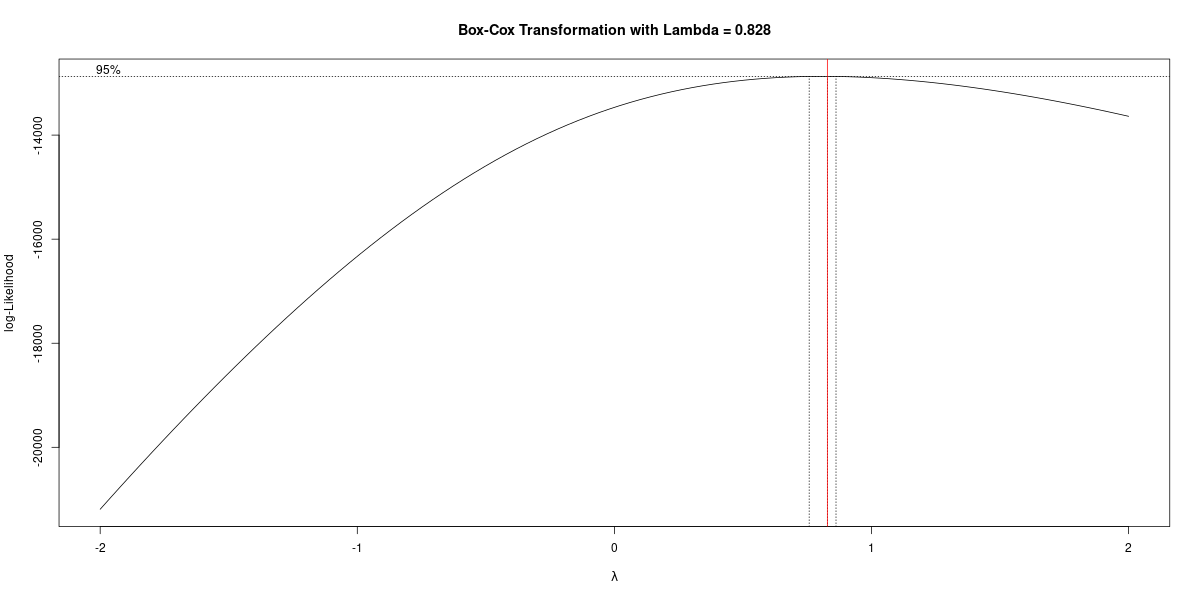

In [11]:
%%R -w 1200 -h 600

library(forecast)
library(MASS)

b <- boxcox(df$Close ~ 1)
lambda <- b$x[which.max(b$y)]

title(main = paste("Box-Cox Transformation with Lambda =", round(lambda, 3) ))
abline(v = lambda, col = "red")

## 1.2. Grafico Box-Cox

In [12]:
from scipy.stats import boxcox

df_completo['BoxCox_Close'], lambda_value = boxcox(df_completo['Close']) 
print(lambda_value)
plot_(f'Estabilización de la Varianza (Box-cox λ ={lambda_value:.3f} )', (df_completo.index, df_completo["Close"], "Datos Originales"),
      (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"))

0.8088767520459322


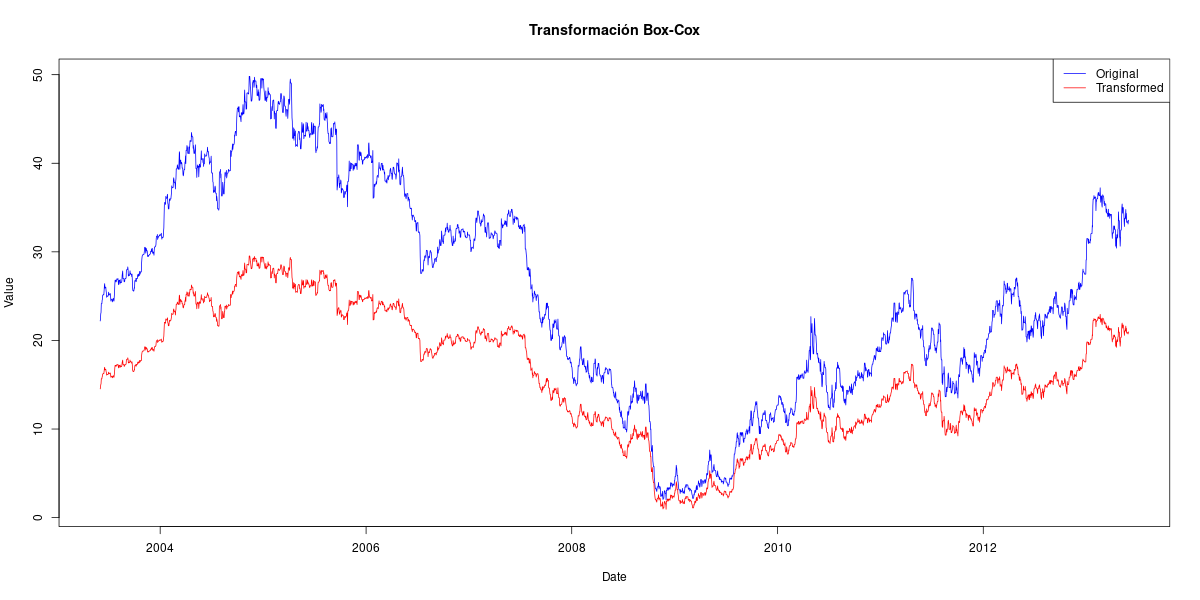

In [13]:
%%R -w 1200 -h 600

transformed_data <- forecast::BoxCox(df$Close, lambda = lambda)
plot(df$Date, df$Close, type = "l", col = "blue", ylim = range(c(df$Close, transformed_data)), 
     xlab = "Date", ylab = "Value", main = paste("Transformación Box-Cox"))
lines(df$Date, transformed_data, col = "red")
legend("topright", legend = c("Original", "Transformed"), col = c("blue", "red"), lty = 1)

# 2. Estimación de la tendencia

## 2.1 Loess

LOESS (Locally Estimated Scatterplot Smoothing) es un método no paramétrico que estima la tendencia de una serie temporal al ajustar múltiples regresiones lineales en pequeñas ventanas de datos a lo largo de la serie. En cada ventana, se calcula una regresión lineal utilizando solo los puntos de datos cercanos, ponderándolos según su distancia al punto central. Luego, se combina estos ajustes locales para generar una curva suave que captura la tendencia general en la serie sin suponer una forma específica para la tendencia, lo que lo hace flexible y adecuado para datos con relaciones no lineales.

In [14]:
from statsmodels.nonparametric.smoothers_lowess import lowess


frac = 0.05  
smoothed_values = lowess(df_completo['BoxCox_Close'], df_completo.index, frac=frac, it=0)
trend_removed = df_completo['BoxCox_Close'] - smoothed_values[:, 1]

plot_('Eliminación de Tendencia por Lowees', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, smoothed_values[:, 1], "Suavizado"),
      (df_completo.index, trend_removed, "Sin Tendencia"))
      

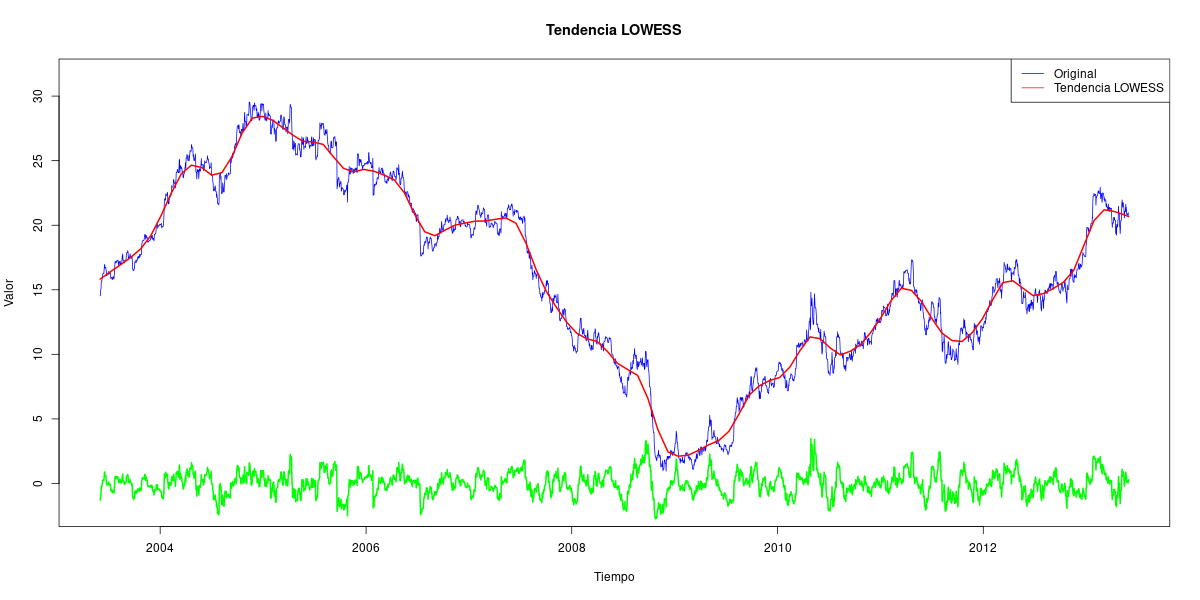

In [15]:
%%R -w 1200 -h 600

# Supongamos que tienes un dataframe df con una columna llamada 'Index'

# Calcular LOWESS
trend_lowess_R <- lowess(transformed_data,  f = 0.05, iter = 0)
trend_removed <- transformed_data - trend_lowess_R$y

# Crear un gráfico de la serie original y la tendencia LOWESS
plot(df$Date, transformed_data, type='l', col='blue', xlab='Tiempo', ylab='Valor', 
     main='Tendencia LOWESS', ylim=c(-2, max(transformed_data)+2))
lines(df$Date, trend_lowess_R$y, col='red', lwd=2)
lines(df$Date, trend_removed, col='green', lwd=2)
legend('topright', legend=c('Original', 'Tendencia LOWESS'), col=c('blue', 'red'), lty=1)


 Solo tiene sentido el AMI y las graficas de retardos solo para series estacionarias o que no tengan tendencia.


Attaching package: ‘astsa’

The following object is masked from ‘package:forecast’:

    gas



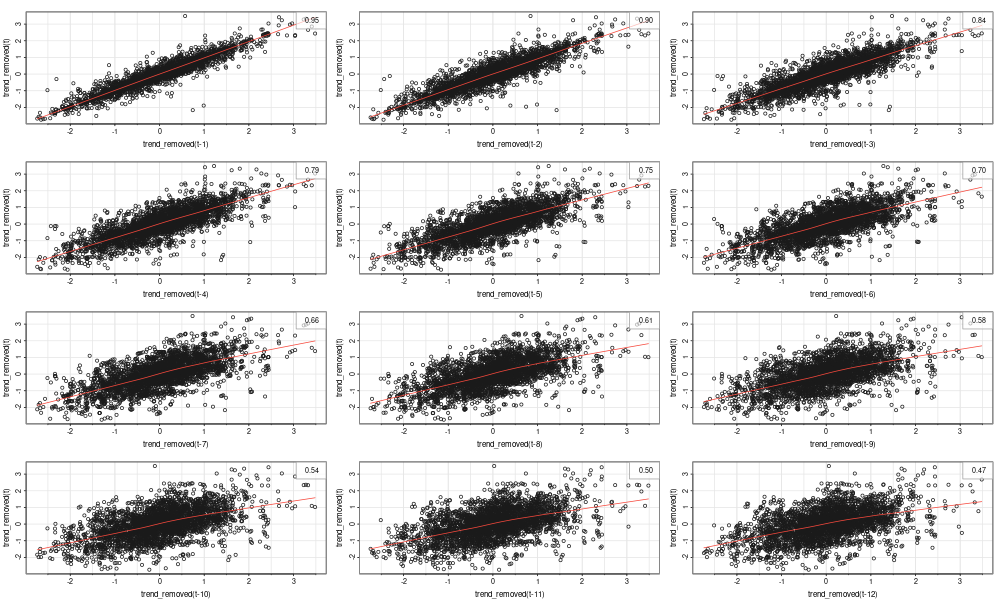

In [16]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(trend_removed, 12)

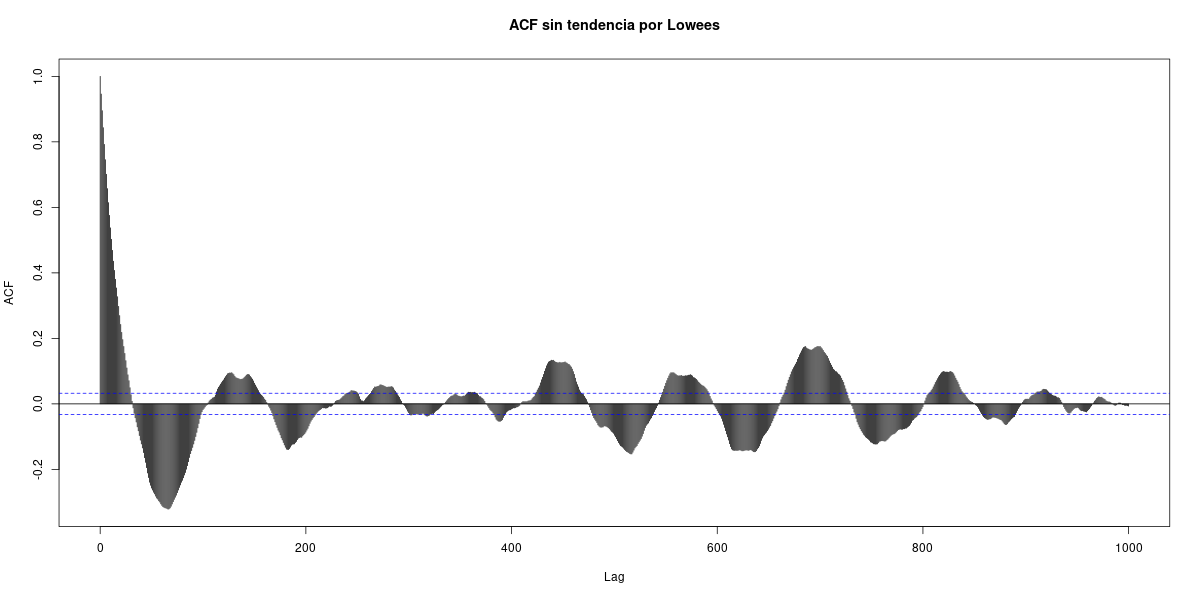

In [17]:
%%R -w 1200 -h 600

acf(trend_removed, lag.max = 1000, main = "ACF sin tendencia por Lowees")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1] 2.16876334 1.10411823 0.81582604 0.64199208 0.52783331 0.44243387
 [7] 0.37815105 0.32388518 0.28052208 0.24208667 0.21095787 0.18730892
[13] 0.16843275 0.15358527 0.14179375 0.12661261 0.11761936 0.10540529
[19] 0.09606464 0.09275556 0.09295149 0.09206252 0.08627298 0.08111405
[25] 0.07600889 0.07026646 0.06729095 0.06754448 0.06816549 0.06286024
[31] 0.06009198 0.05209213 0.05098501 0.05512315 0.05938976 0.06746769
[37] 0.06013544 0.05865953 0.05929873 0.06263220 0.06754617 0.07184496
[43] 0.07738072 0.07693398 0.07950386 0.08182324 0.08484555 0.09036072
[49] 0.09833396 0.10150996 0.10200830

$units
[1] "Nats"

$n.partitions
[1] 15

attr(,"class")
[1] "mutualInf"


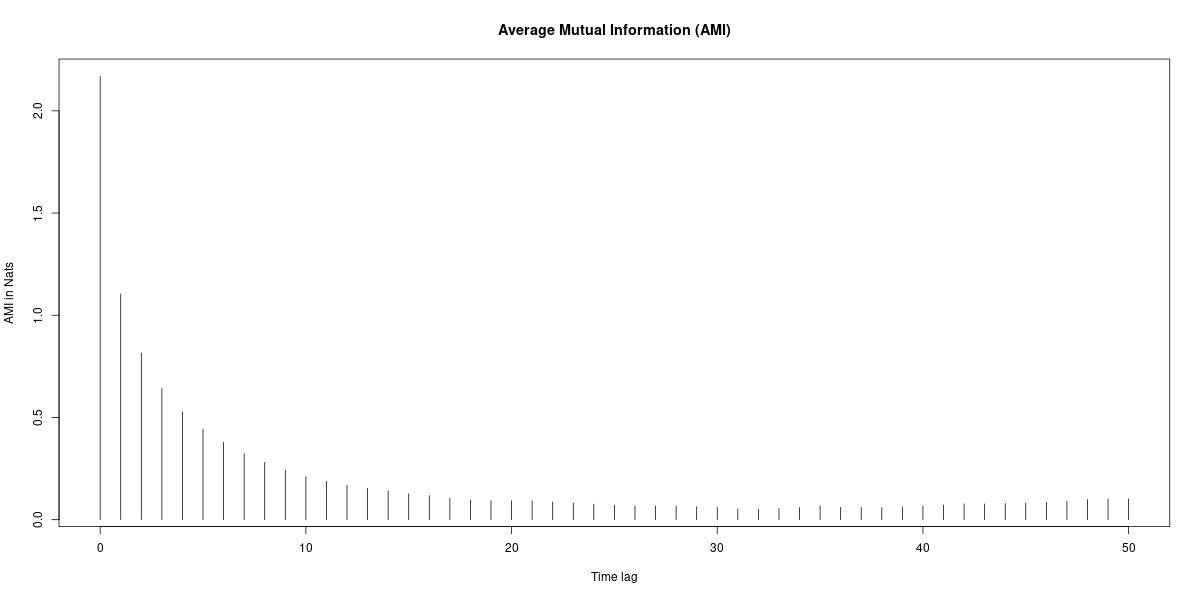

In [18]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(trend_removed,lag.max = 50, main="Información mutua")

## 2.2 Diferencia ordinaria



Apliquemos una diferencia ordinaria de orden 1 a la serie

$$
\nabla^1 Y_t=(1-B)^1 Y_t=Y_t-Y_{t-1}
$$

In [19]:
Close_diff = df_completo['BoxCox_Close'].diff()

plot_('Diferenciación de la Serie Temporal', (df_completo.index, df_completo["BoxCox_Close"], "BoxCox"),
      (df_completo.index, Close_diff, "Diferencia Ordinaria"))

In [20]:
%R -i Close_diff

In [21]:
%%R

Close_diff <- na.omit(Close_diff)

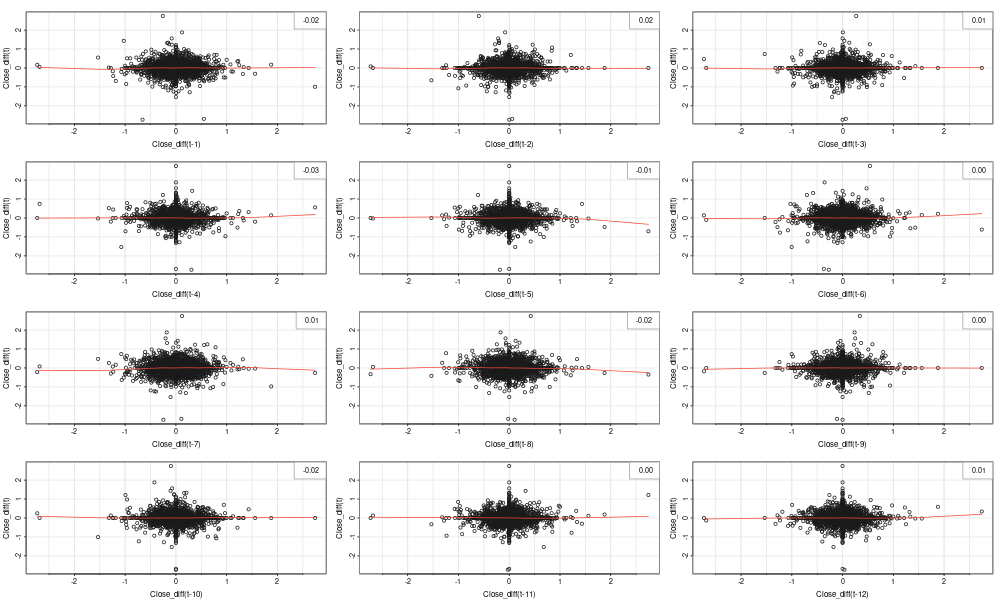

In [22]:
%%R -w 1000 -h 600
options(repr.plot.width=20, repr.plot.height=6)
library(astsa)
astsa::lag1.plot(Close_diff, 12)

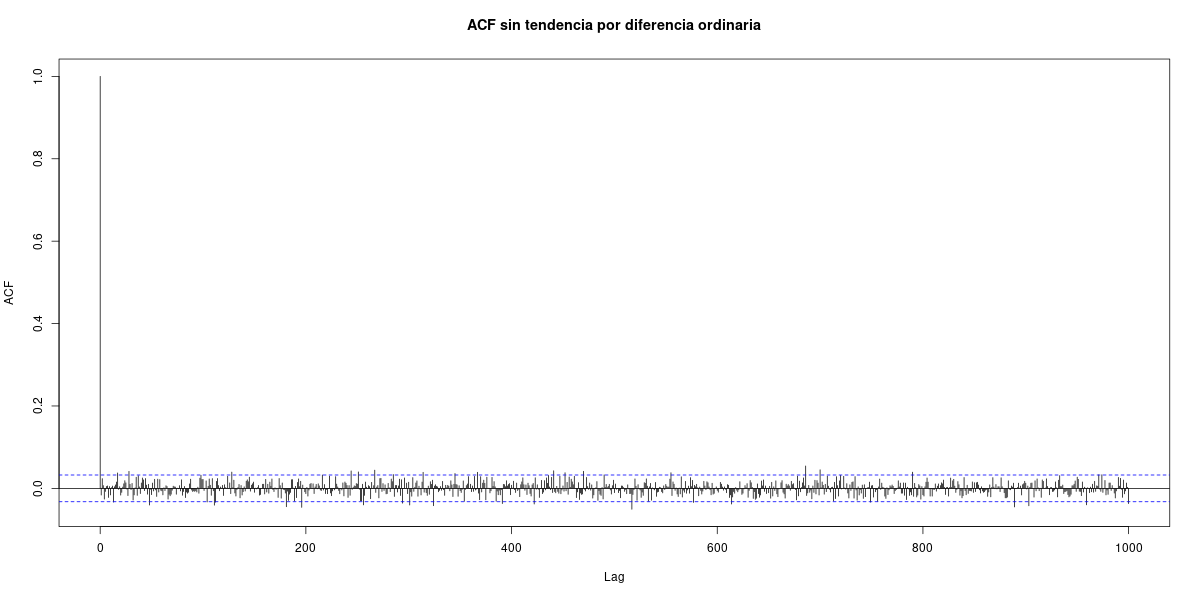

In [23]:
%%R -w 1200 -h 600

acf(Close_diff, lag.max = 1000, main = "ACF sin tendencia por diferencia ordinaria")

$time.lag
 [1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50

$mutual.information
 [1]  1.0645073074  0.0157784677  0.0146086282  0.0088962959  0.0141649340
 [6]

  0.0105479860  0.0200940875  0.0422293637  0.0136133227  0.0119989806
[11]  0.0136966302  0.0122210175  0.0080480330  0.0160195399  0.0401346283
[16]  0.0133572206  0.0070922366  0.0113458166  0.0147520653  0.0063603360
[21]  0.0143147928  0.0361337071  0.0091688083  0.0066329830  0.0091387718
[26]  0.0077634964  0.0028407007  0.0069283208  0.0342453973  0.0053206932
[31]  0.0049093220  0.0071150393  0.0058866239  0.0011461898  0.0077305448
[36]  0.0258905017  0.0066000584  0.0034445281  0.0040293735  0.0056650709
[41]  0.0050621976  0.0076137212  0.0252890549  0.0043874469 -0.0019225192
[46]  0.0009761359  0.0011879783 -0.0045821192  0.0010027146  0.0244232007
[51]  0.0024362146

$units
[1] "Nats"

$n.partitions
[1] 15

attr(,"class")
[1] "mutualInf"


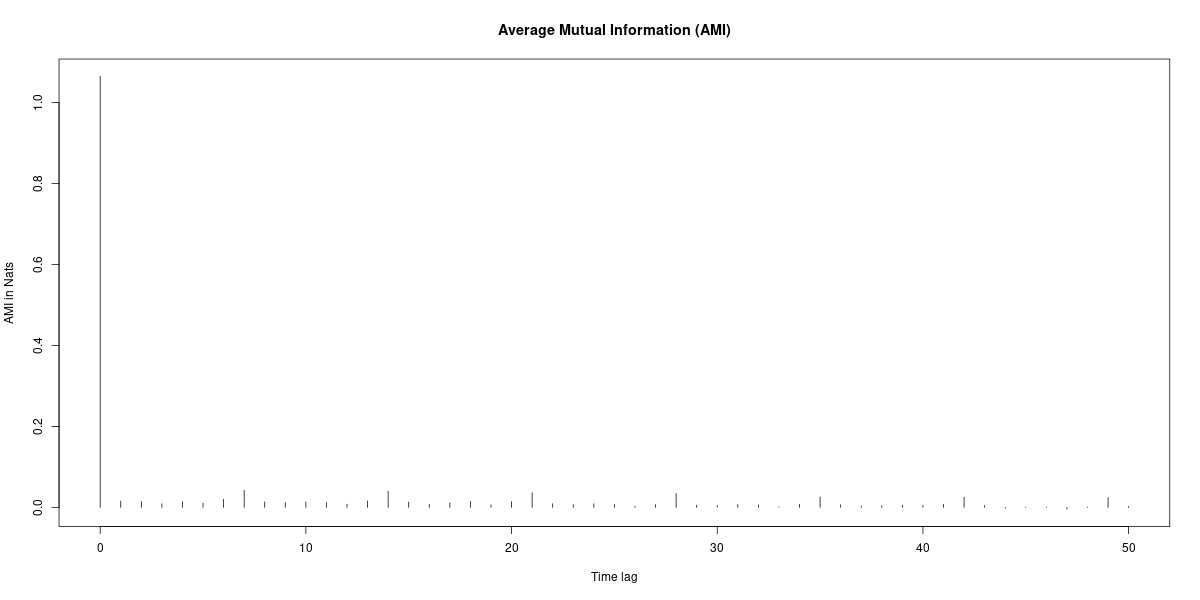

In [24]:
%%R -w 1200 -h 600
nonlinearTseries::mutualInformation(Close_diff,lag.max = 50, main="Información mutua de la diferencia ordinaria")

# 3. Estacionalidad

In [25]:
df_completo['Trend_Removed'] = trend_removed
df_completo.reset_index(inplace=True)
df_completo['Day_Name'] = df_completo['Date'].dt.day_name()
df_completo

Date      Close  BoxCox_Close  Trend_Removed   Day_Name
0    2003-06-02  22.200001     13.939507      -1.218252     Monday
1    2003-06-03  22.400000     14.050000      -1.122872    Tuesday
2    2003-06-04  23.000000     14.380359      -0.807604  Wednesday
3    2003-06-05  23.150000     14.462690      -0.740344   Thursday
4    2003-06-06  24.150000     15.008996      -0.209087     Friday
...         ...        ...           ...            ...        ...
3647 2013-05-27  33.340000     19.850442       0.118335     Monday
3648 2013-05-28  33.490002     19.927149       0.202845    Tuesday
3649 2013-05-29  33.139999     19.748064       0.031559  Wednesday
3650 2013-05-30  33.490002     19.927149       0.218439   Thursday
3651 2013-05-31  33.570000     19.968031       0.267109     Friday

[3652 rows x 5 columns]

In [26]:
import plotly.express as px


# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Day_Name', y='Trend_Removed', title='Box Plot de trend_removed por Día de la Semana', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Día de la Semana', title_x=0.5)
fig.show()

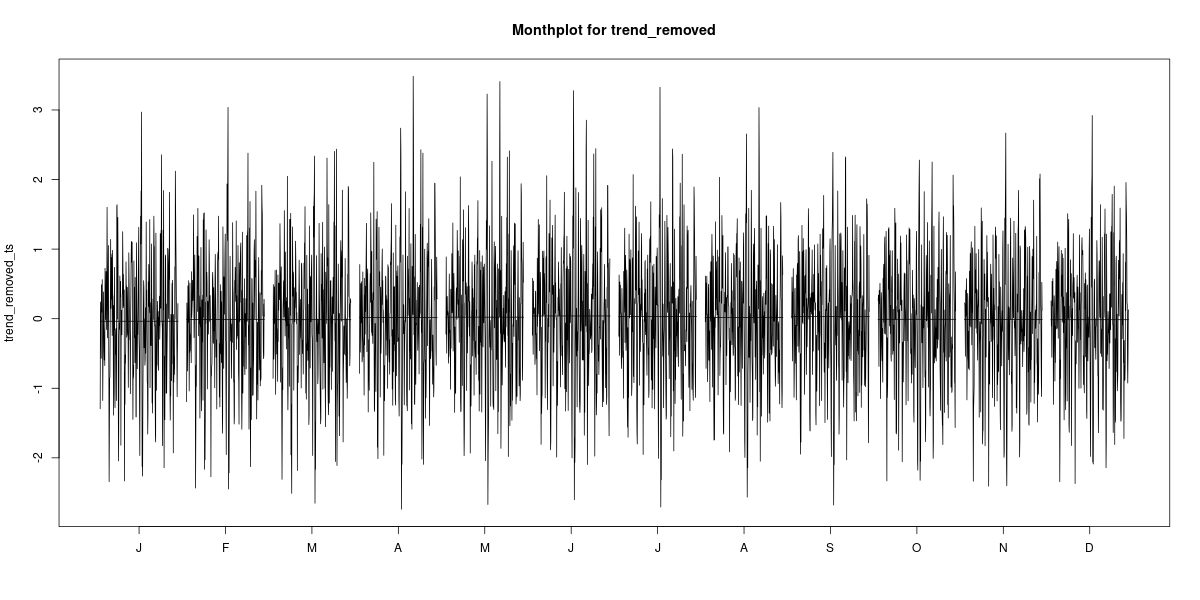

In [27]:
%%R -w 1200 -h 600
# Convert the Date column to Date class if it is not already

trend_removed_ts <- ts(trend_removed, start = start(df$Date), frequency = 12)
monthplot(trend_removed_ts, main = 'Monthplot for trend_removed')

In [28]:
# Extraer el mes de la fecha
df_completo['Month'] = df_completo['Date'].dt.month_name()

# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Month', y='Trend_Removed', title='Box Plot de trend_removed por Mes', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Mes', title_x=0.5)
fig.show()


In [29]:
# Extraer el año de la fecha
df_completo['Year'] = df_completo['Date'].dt.year

# Crear el box plot utilizando plotly.express
fig = px.box(df_completo, x='Year', y='Trend_Removed', title='Box Plot de trend_removed por Año', labels={'Trend_Removed': 'Trend Removed'})
fig.update_layout(title_text='Box Plot por Año', title_x=0.5)
fig.show()

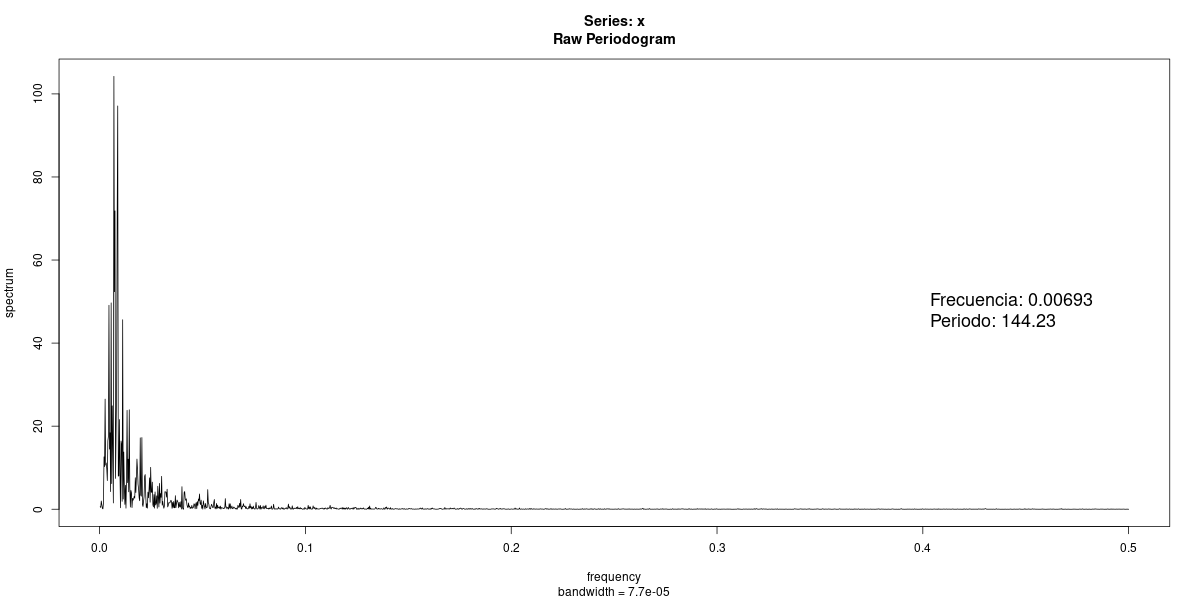

In [30]:
%%R -w 1200 -h 600

# Calculate the periodogram for data2
Periogram <- spectrum(as.numeric(trend_removed_ts), log = 'no')

# Get the index where the periodogram maximizes
ubicacion <- which.max(Periogram$spec)

# Get the frequency value at the index where the periodogram maximizes
max_freq <- Periogram$freq[ubicacion]

# Calculate the corresponding period
max_period <- 1 / max_freq

# Plot the periodogram for data2

# Add text annotation for frequency and period
text(.4, 50, sprintf("Frecuencia: %s", round(max_freq, 5)), pos = 4, cex = 1.5)
text(.4, 45, sprintf("Periodo: %s", round(max_period, 2)), pos = 4, cex = 1.5)

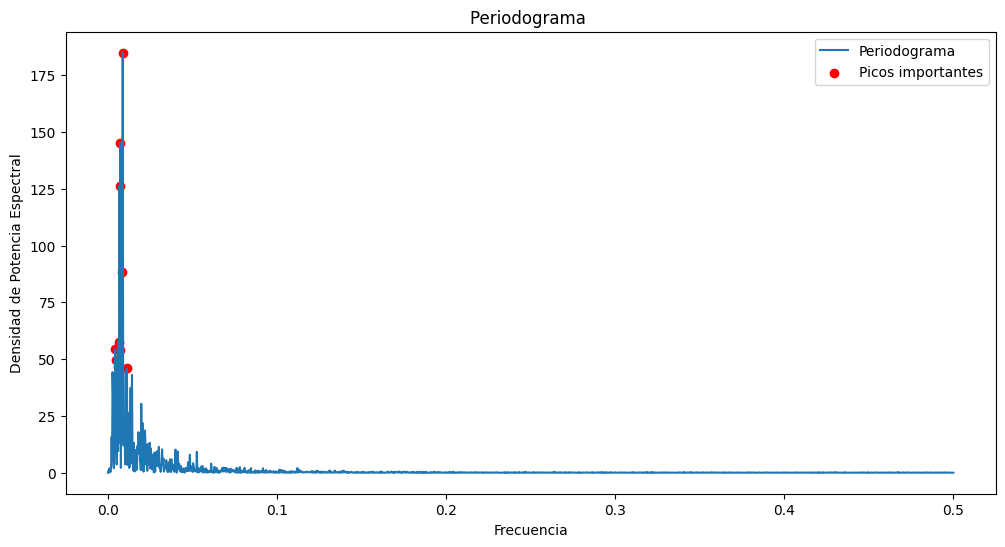

Los 10 Picos mas grandes para el periodograma son:


0           1           2  \
Frecuencia                        0.008762    0.007393    0.006846   
Periodo                         114.125000  135.259259  146.080000   
Densidad de Potencia Espectral  184.924098  145.230325  126.337694   

                                         3           4           5  \
Frecuencia                        0.008488    0.006298    0.004381   
Periodo                         117.806452  158.782609  228.250000   
Densidad de Potencia Espectral   88.428242   57.711150   54.288351   

                                         6           7           8          9  
Frecuencia                        0.007119    0.004929    0.005750   0.011227  
Periodo                         140.461538  202.888889  173.904762  89.073171  
Densidad de Potencia Espectral   54.014783   49.639038   46.455320  45.906499

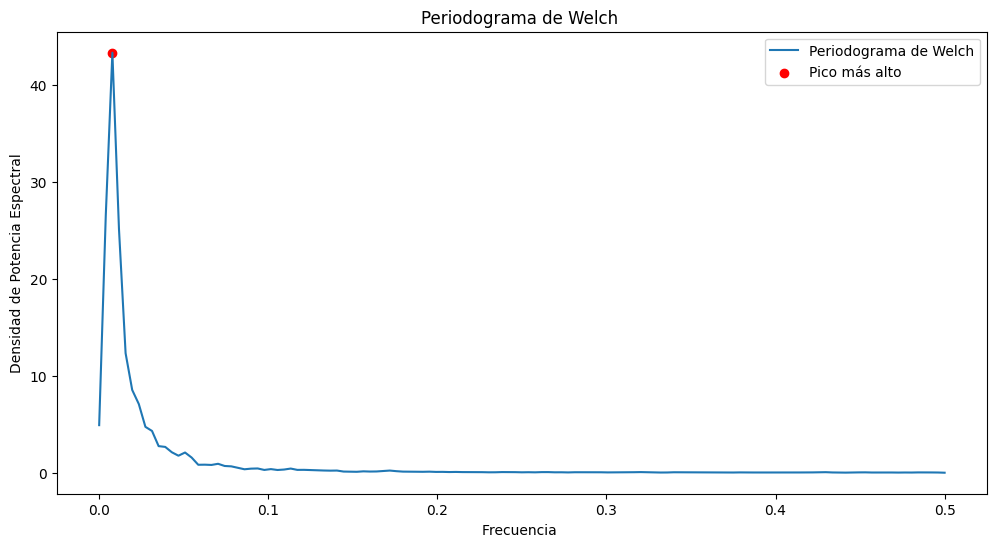

El pico más notorio se da: 
 - Frecuencia: 0.0078125  
                                    
 - Periodo: 128.0 
                                    
 - Densidad de Potencia Espectral: 43.35889839122304


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import heapq


# Calcular el periodograma
f, Pxx_den = signal.periodogram(trend_removed)

# Encontrar los picos más importantes
peaks_indices = heapq.nlargest(10, range(len(Pxx_den)), key=Pxx_den.__getitem__)
f_freq = f[peaks_indices]
densidad = Pxx_den[peaks_indices]
f_period = 1 / f[peaks_indices]

# Calcular el periodograma de Welch
f_welch, Pxx_den_welch = signal.welch(trend_removed)

# Encontrar el pico más alto del periodograma de Welch
max_index_value_welch = np.argmax(Pxx_den_welch)
frecuencia_max_welch = f_welch[max_index_value_welch]
frecuencia_pico_welch = 1 / frecuencia_max_welch




# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(f, Pxx_den, label='Periodograma')
plt.scatter(f[peaks_indices], Pxx_den[peaks_indices], color='red', label='Picos importantes')

plt.xlabel('Frecuencia')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma ')
plt.legend()
plt.show()

print('Los 10 Picos mas grandes para el periodograma son:')

# Crear DataFrame con las frecuencias y los periodos
data = {'Frecuencia': f_freq, 'Periodo': f_period, 'Densidad de Potencia Espectral': densidad}
df_frecuencias_periodos = pd.DataFrame(data).sort_values(by='Densidad de Potencia Espectral', ascending=False)

# Mostrar el DataFrame
display(df_frecuencias_periodos.T)

# Graficar el periodograma de Welch
plt.figure(figsize=(12, 6))
plt.plot(f_welch, Pxx_den_welch, label='Periodograma de Welch')
plt.scatter(frecuencia_max_welch, Pxx_den_welch[max_index_value_welch], color='red', label='Pico más alto')

plt.xlabel('Frecuencia ')
plt.ylabel('Densidad de Potencia Espectral')
plt.title('Periodograma de Welch ')
plt.legend()
plt.show()

print(f"""El pico más notorio se da: \n - Frecuencia: {frecuencia_max_welch}  
                                    \n - Periodo: {frecuencia_pico_welch} 
                                    \n - Densidad de Potencia Espectral: {Pxx_den_welch[max_index_value_welch]}""")

Teniendo presente que un año de trading es aproximadamente 252 días, se observa que segpun los resultados de los diferentes periodogramas:

- 139, Equivale a  55% de un año
- 143, Equivale a  56% de un año
- 128, Equivale a  51% de un año

# 4. Modelado

In [32]:

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

plot_("Train and Test Data",
      (train_data['Date'], train_data['Close'], "Train Data"),
      (test_data['Date'], test_data['Close'], "Test Data"),
      (val_data['Date'], val_data['Close'], "Validation Data"))

In [33]:
import pandas as pd
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
import warnings
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from skopt import gp_minimize
from skopt.space import Real

warnings.filterwarnings('ignore')

# Supongamos que `df_completo` ya está cargado y tiene las columnas 'Date' y 'Close'
# Segmentación de los datos
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size + val_size]
test_data = df_completo.iloc[train_size + val_size:]

# Configuración de los modelos
models = ["AAd", "AA", "AM"]

# DataFrame para almacenar los mejores parámetros
best_params = pd.DataFrame(columns=["Modelo", "Parametro", "Valor"])

# Función para entrenar y predecir usando ETS sin estacionalidad
def train_and_predict(df, error, trend, damped, alpha, beta):
    model = ETSModel(df['Close'], error=error, trend=trend, damped_trend=damped)
    fitted_model = model.fit(disp=False, maxiter=1000, use_boxcox=True, smoothing_level=alpha, smoothing_slope=beta)
    return fitted_model.forecast(steps=1), fitted_model

def plot_residuals_and_stats(residuals, title, ax):
    # Residuos
    ax.plot(residuals)
    ax.set_title(f'Residuos - {title}')

    # Autocorrelación
    sm.graphics.plot_acf(residuals, ax=ax.figure.add_subplot(3, 1, 2))
    ax.figure.axes[1].set_title('Autocorrelación')

    # Tendencia
    trend = np.polyfit(np.arange(len(residuals)), residuals, 1)[0]
    r, p = pearsonr(np.arange(len(residuals)), residuals)
    ax.figure.add_subplot(3, 1, 3).plot(np.arange(len(residuals)), residuals, 'b-')
    ax.figure.add_subplot(3, 1, 3).plot(np.arange(len(residuals)), trend * np.arange(len(residuals)), 'r--')
    ax.figure.add_subplot(3, 1, 3).set_title(f'Tendencia (r={r:.2f}, p={p:.2f})')

    plt.tight_layout()

# Optimización de parámetros en el conjunto de validación
for model in tqdm(models, desc="Optimización de Parámetros"):
    # Mapear los valores de modelo a los valores correctos de 'trend' y 'damped'
    trend = 'add' if model[1] == 'A' else 'mul'
    damped = 'd' in model

    def objective(params):
        alpha, beta = params
        pred, fitted_model = train_and_predict(train_data, error='add', trend=trend, damped=damped, alpha=alpha, beta=beta)
        val_predictions = fitted_model.forecast(steps=len(val_data))
        mse = mean_squared_error(val_data['Close'], val_predictions)
        return mse

    bounds = [(0.01, 0.99), (0.01, 0.99)]
    res = gp_minimize(objective, bounds, n_calls=50, random_state=42)

    best_alpha, best_beta = res.x
    best_params = pd.concat([best_params, pd.DataFrame({
        "Modelo": [model],
        "Parametro": ["alpha"],
        "Valor": [best_alpha]
    })], ignore_index=True)

    best_params = pd.concat([best_params, pd.DataFrame({
        "Modelo": [model],
        "Parametro": ["beta"],
        "Valor": [best_beta]
    })], ignore_index=True)

display(best_params)

# Rolling prediction en los datos de prueba usando los mejores parámetros
test_residuals = {model: [] for model in models}

for i in tqdm(range(len(test_data)), desc="Rolling ETS models"):
    expanded_train_data = pd.concat([train_data, test_data.iloc[:i]])

    for model in models:
        trend = 'add' if model[1] == 'A' else 'mul'
        damped = 'd' in model

        pred, fitted_model = train_and_predict(expanded_train_data, 
                                               error='add', 
                                               trend=trend, 
                                               damped=damped,
                                               alpha=best_params[(best_params["Modelo"] == model) & (best_params["Parametro"] == "alpha")]["Valor"].values[0],
                                               beta=best_params[(best_params["Modelo"] == model) & (best_params["Parametro"] == "beta")]["Valor"].values[0])

        test_residuals[model].append(test_data['Close'].iloc[i] - pred.iloc[0])



Optimización de Parámetros: 100%|██████████| 3/3 [01:35<00:00, 31.84s/it]


Modelo Parametro     Valor
0    AAd     alpha  0.790612
1    AAd      beta  0.189766
2     AA     alpha  0.790612
3     AA      beta  0.189766
4     AM     alpha  0.790612
5     AM      beta  0.189766

Rolling ETS models: 100%|██████████| 549/549 [05:01<00:00,  1.82it/s]


In [34]:
plot_("Predicción ETS", (test_data['Date'], test_data['Close'], "Datos de Prueba"),
      (test_data['Date'], test_data['Close'] - test_residuals["AAd"], "Predicción AAd"),
      (test_data['Date'], test_data['Close'] - test_residuals["AA"], "Predicción AA"),
      (test_data['Date'], test_data['Close'] - test_residuals["AM"], "Predicción AM"))

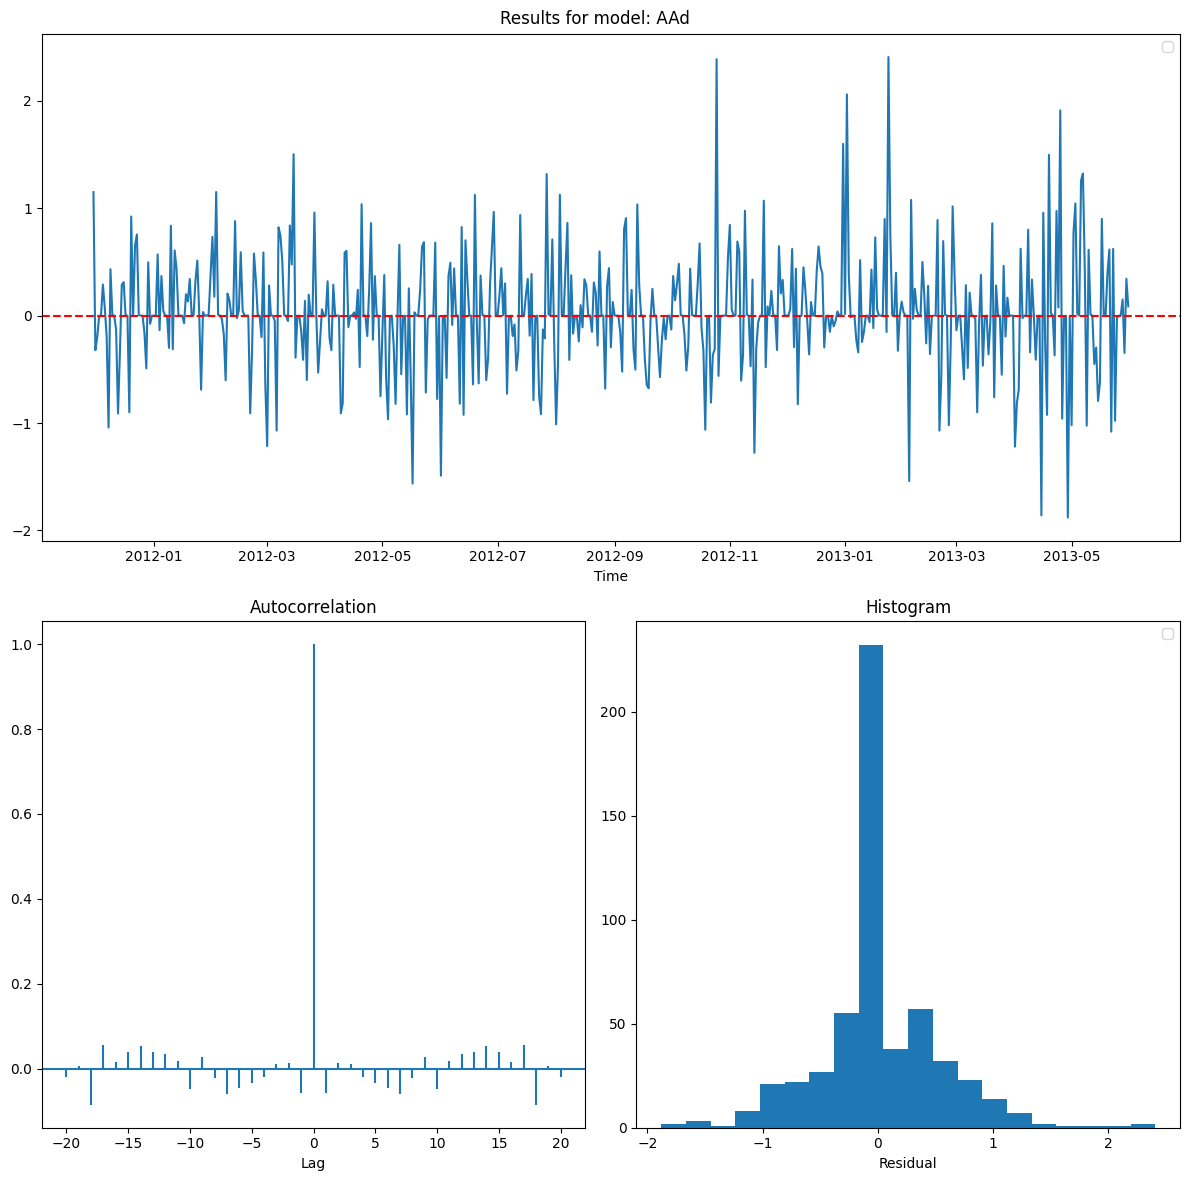

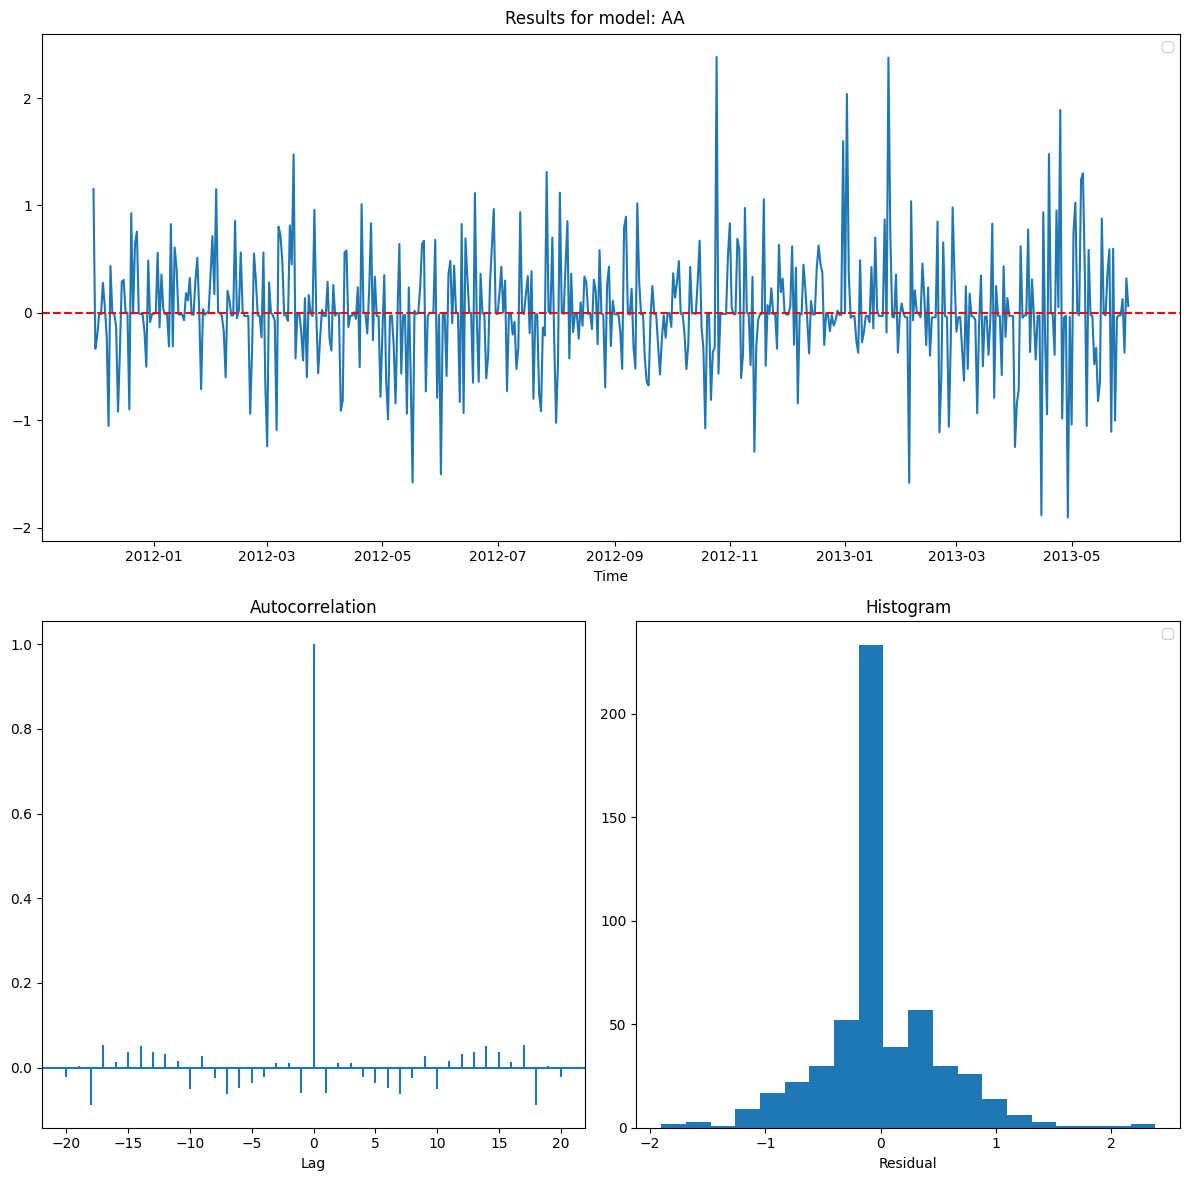

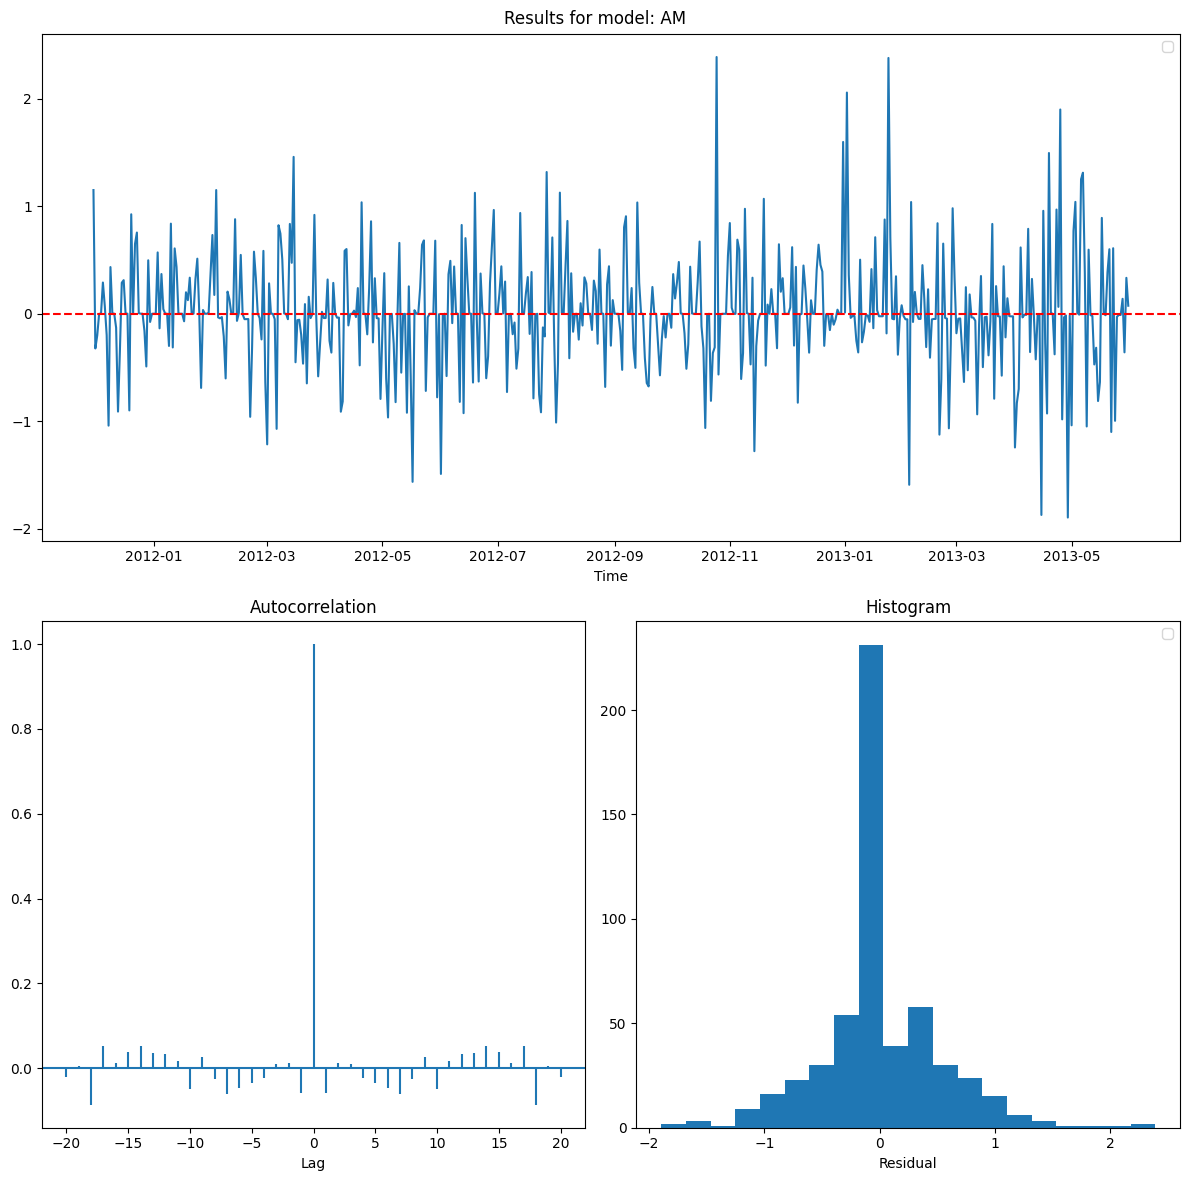

Family Model       MSE
0    ETS   AAd  0.273729
1    ETS    AA  0.274045
2    ETS    AM  0.274758

In [35]:
def plot_residuals_and_stats(date, test_residual, title, fig, axs):
    plt.suptitle(f'Results for model: {title}')

    # Residuals
    axs["A"].plot(date, test_residual)
    axs["A"].set_xlabel('Time')
    axs["A"].axhline(0, color='red', linestyle='--')
    axs["A"].legend()

    # Autocorrelation
    axs["B"].acorr(test_residual, maxlags=20)
    axs["B"].set_title('Autocorrelation')
    axs["B"].set_xlabel('Lag')

    # Histogram
    axs["C"].hist(test_residual, bins=20)
    axs["C"].set_title('Histogram')
    axs["C"].set_xlabel('Residual')
    axs["C"].legend()

    plt.tight_layout()
    
    
for model in models:
    fig, axs = plt.subplot_mosaic("AA;BC", figsize=(12, 12))
    plot_residuals_and_stats(test_data['Date'], test_residuals[model], model, fig, axs)
    plt.show()

mse_results_ETS = {
    "Family": "ETS",
    "Model": models,
    "MSE": [mean_squared_error(test_data['Close'], test_data['Close'] - test_residuals[model]) for model in models]
}

mse_ETS = pd.DataFrame(mse_results_ETS).sort_values(by='MSE').reset_index(drop=True)
display(mse_ETS)

## Arboles de decisión

Mejor lag: 10
Mejor profundidad: 7
Entrenamiento - R2: 0.9991, MSE: 0.1776
Validación - R2: 0.9809, MSE: 0.2343
Prueba - R2: 0.9877, MSE: 0.3500


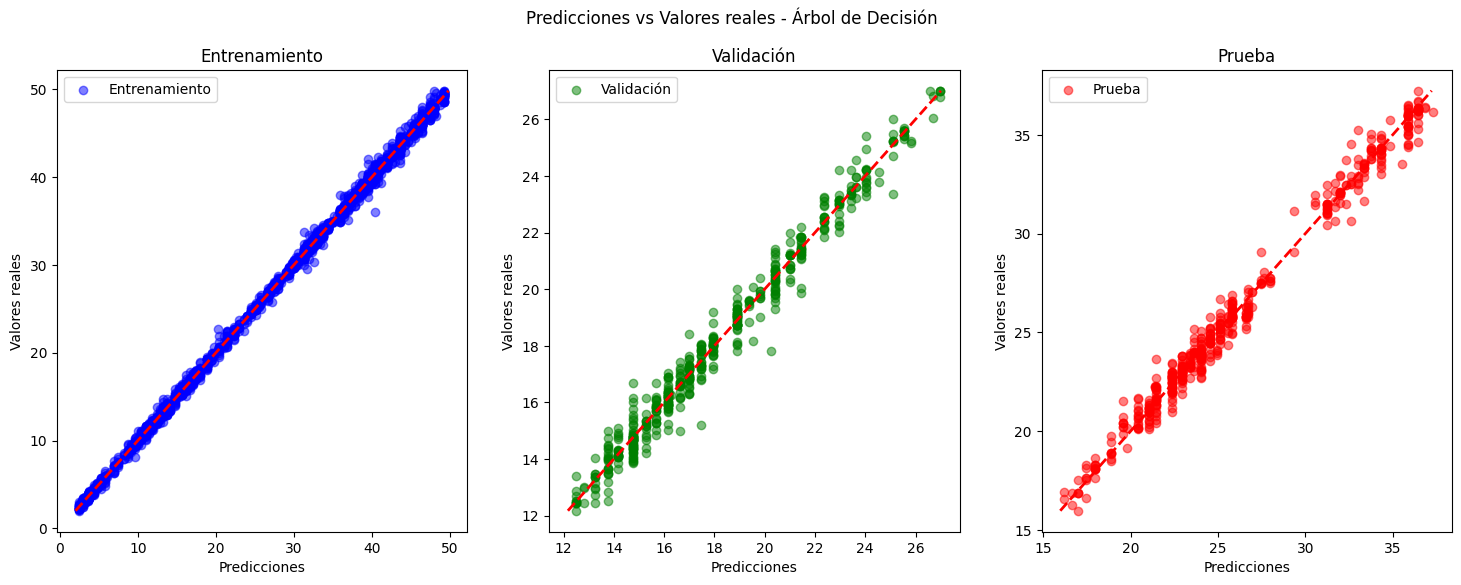

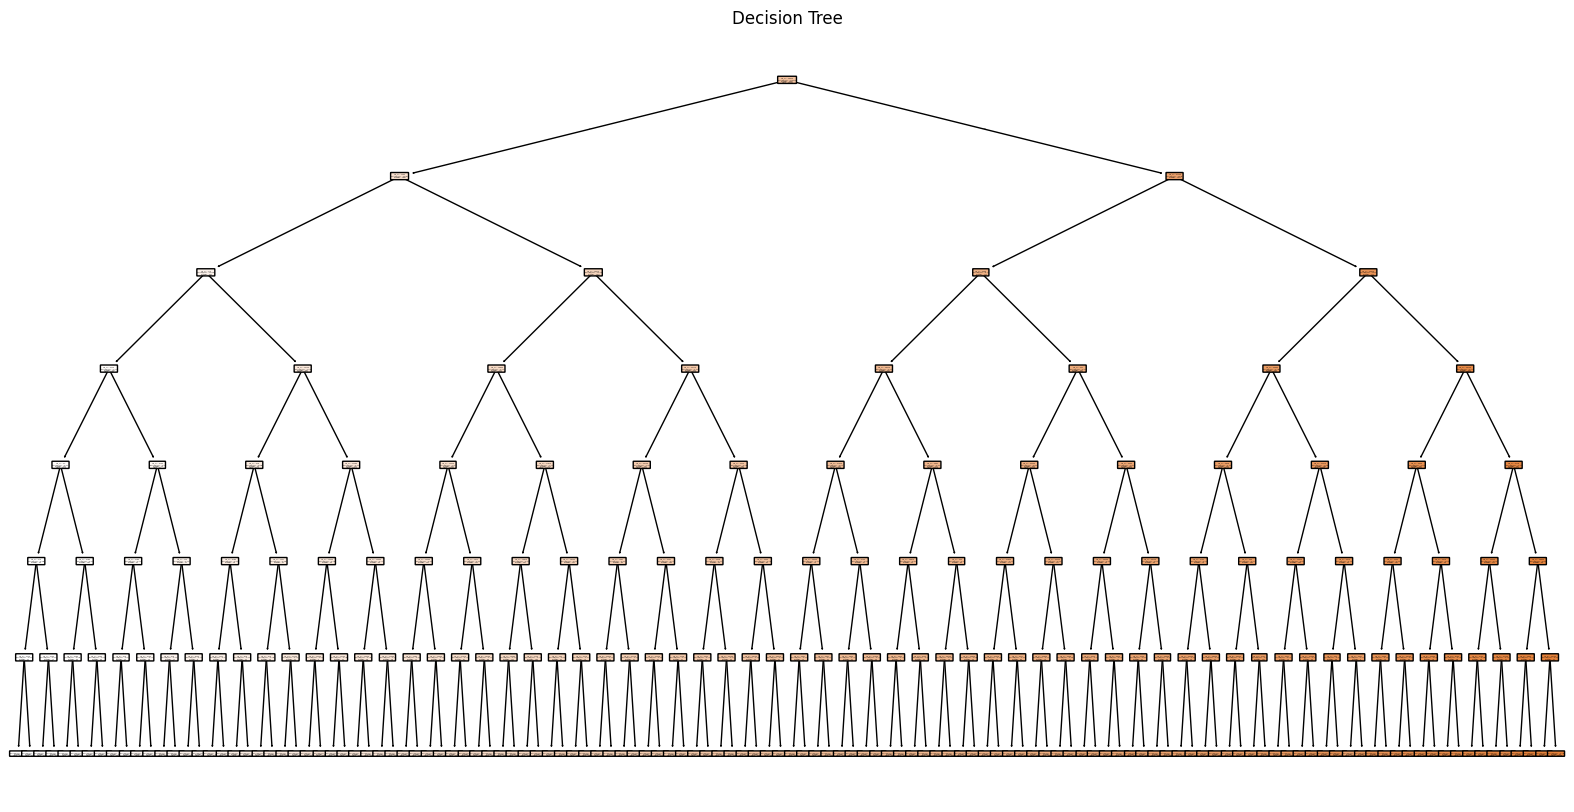

In [36]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Asumiendo que ya tienes df_completo definido como mencionaste

def create_features(data, lag):
    df = pd.DataFrame(index=data.index)
    df['target'] = data['Close']
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = data['Close'].shift(i)
    return df.dropna()

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

# Función para evaluar el modelo
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, r2, predictions

# Buscar el mejor lag y la mejor profundidad del árbol
best_lag = 0
best_depth = 0
best_val_mse = np.inf

# Buscar el mejor lag
for lag in range(1, 21):
    # Crear características para train, validación y test
    train_features = create_features(train_data.set_index('Date'), lag)
    val_features = create_features(val_data.set_index('Date'), lag)
    test_features = create_features(test_data.set_index('Date'), lag)

    # Separar características (X) y objetivo (y)
    X_train = train_features.drop('target', axis=1)
    y_train = train_features['target']
    X_val = val_features.drop('target', axis=1)
    y_val = val_features['target']

    # Entrenar el modelo con el lag actual
    model = DecisionTreeRegressor(max_depth=10, random_state=42)
    model.fit(X_train, y_train)

    # Evaluar el modelo en el conjunto de validación
    val_mse, val_r2, _ = evaluate_model(model, X_val, y_val)

    if val_mse < best_val_mse:
        best_val_mse = val_mse
        best_lag = lag

print(f"Mejor lag: {best_lag}")

# Buscar la mejor profundidad del árbol
best_depth = 0
best_val_mse = np.inf

for depth in range(1, 21):
    # Crear características para train, validación y test con el mejor lag
    train_features = create_features(train_data.set_index('Date'), best_lag)
    val_features = create_features(val_data.set_index('Date'), best_lag)
    test_features = create_features(test_data.set_index('Date'), best_lag)

    # Separar características (X) y objetivo (y)
    X_train = train_features.drop('target', axis=1)
    y_train = train_features['target']
    X_val = val_features.drop('target', axis=1)
    y_val = val_features['target']

    # Entrenar el modelo con la profundidad actual
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    val_mse, val_r2, _ = evaluate_model(tree, X_val, y_val)

    if val_mse < best_val_mse:
        best_val_mse = val_mse
        best_depth = depth

print(f"Mejor profundidad: {best_depth}")

# Crear características finales con el mejor lag
train_features = create_features(train_data.set_index('Date'), best_lag)
val_features = create_features(val_data.set_index('Date'), best_lag)
test_features = create_features(test_data.set_index('Date'), best_lag)

# Separar características (X) y objetivo (y)
X_train = train_features.drop('target', axis=1)
y_train = train_features['target']
X_val = val_features.drop('target', axis=1)
y_val = val_features['target']
X_test = test_features.drop('target', axis=1)
y_test = test_features['target']

# Entrenar el modelo final con la mejor profundidad
final_model = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
final_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Evaluar el modelo en los conjuntos de entrenamiento, validación y prueba
train_mse, train_r2, train_pred = evaluate_model(final_model, X_train, y_train)
val_mse, val_r2, val_pred = evaluate_model(final_model, X_val, y_val)
test_mse, test_r2, test_pred = evaluate_model(final_model, X_test, y_test)

print(f"Entrenamiento - R2: {train_r2:.4f}, MSE: {train_mse:.4f}")
print(f"Validación - R2: {val_r2:.4f}, MSE: {val_mse:.4f}")
print(f"Prueba - R2: {test_r2:.4f}, MSE: {test_mse:.4f}")

data_sets = [
    ('Entrenamiento', train_pred, y_train, 'blue'),
    ('Validación', val_pred, y_val, 'green'),
    ('Prueba', test_pred, y_test, 'red')
]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, (title, pred, true, color) in enumerate(data_sets):
    axs[i].scatter(pred, true, alpha=0.5, label=title, color=color)
    axs[i].plot([true.min(), true.max()], [true.min(), true.max()], 'r--', lw=2)
    axs[i].set_xlabel('Predicciones')
    axs[i].set_ylabel('Valores reales')
    axs[i].set_title(title)
    axs[i].legend()

plt.suptitle('Predicciones vs Valores reales - Árbol de Decisión')
plt.show()

# Asumiendo que tienes una función plot_ definida
test_date = test_data['Date'] + pd.DateOffset(days=best_lag)
plot_("Predicciones de la Serie Temporal",
      (test_data['Date'], test_data['Close'], "Datos de Prueba"),
      (test_date, test_pred, "Predicciones"))

plt.figure(figsize=(20, 10))
plot_tree(final_model, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Decision Tree")
plt.show()

residuals = y_test - test_pred

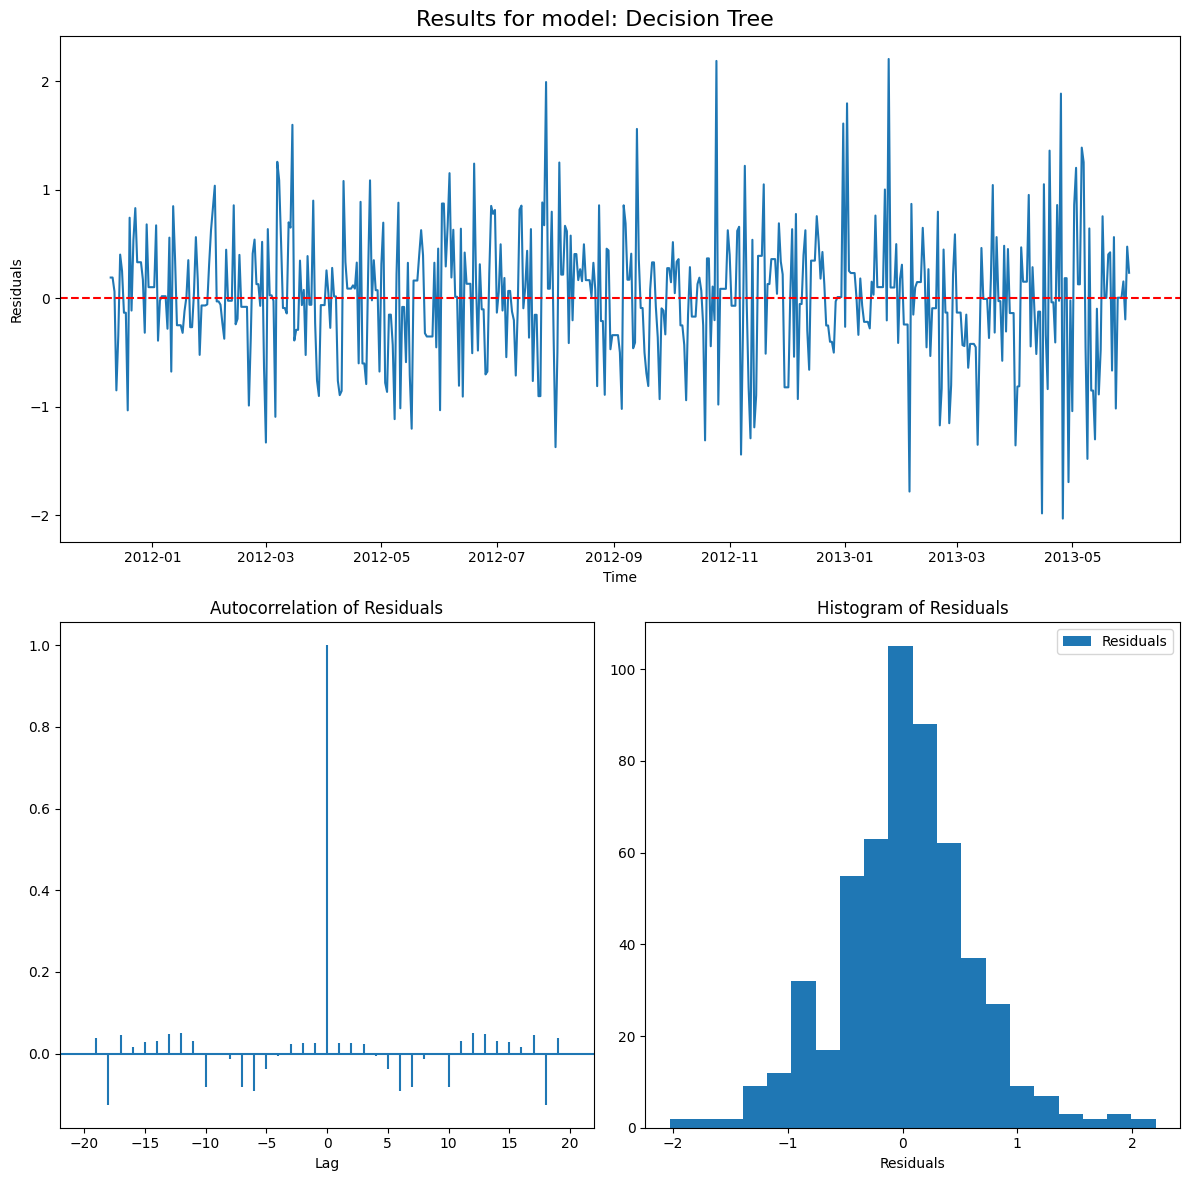

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que 'residuals' es una lista o array de residuos ya calculados
residuals_series = pd.Series(residuals, index=residuals.index)

def plot_residuals_and_stats(residuals_series, title, fig, axs):
    # Configuración del título de la figura
    fig.suptitle(f'Results for model: {title}', fontsize=16)

    # Residuals vs Time
    axs["A"].plot(residuals_series)
    axs["A"].set_xlabel('Time')
    axs["A"].set_ylabel('Residuals')
    axs["A"].axhline(0, color='red', linestyle='--')

    # Autocorrelation of Residuals
    axs["B"].acorr(residuals_series.values, maxlags=20)
    axs["B"].set_title('Autocorrelation of Residuals')
    axs["B"].set_xlabel('Lag')

    # Histogram of Residuals
    axs["C"].hist(residuals_series.values, bins=20)
    axs["C"].set_title('Histogram of Residuals')
    axs["C"].set_xlabel('Residuals')
    axs["C"].legend(['Residuals'])

    plt.tight_layout()

# Ejemplo de uso:

# Creación de la figura y subplots
fig, axs = plt.subplot_mosaic("AA;BC", figsize=(12, 12))

# Llamada a la función con la serie de residuos y el título del modelo
plot_residuals_and_stats(residuals_series, "Decision Tree", fig, axs)

# Mostrar la gráfica
plt.show()


In [38]:
mse_results_tree = {
    "Family": "Árbol de Decisión",
    "Model": "Arbol de Decision",
    "MSE": mean_squared_error(y_test, test_pred)
}
mse_tree = pd.DataFrame(mse_results_tree, index=[0])
mse_tree

Family              Model       MSE
0  Árbol de Decisión  Arbol de Decision  0.350005

## Redes neuronales

Trial 50 Complete [00h 00m 18s]
val_loss: 0.00011577637269510888

Best val_loss So Far: 0.0001137814724643249
Total elapsed time: 00h 13m 16s
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Entrenamiento - R2: 0.9979, RMSE: 0.0133
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validación - R2: 0.9727, RMSE: 0.0121
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Prueba - R2: 0.9865, RMSE: 0.0131

Mejores hiperparámetros:
Número de capas ocultas: 2
Capa 1:
  Unidades: 64
  Activación: relu
Capa 2:
  Unidades: 64
  Activación: relu


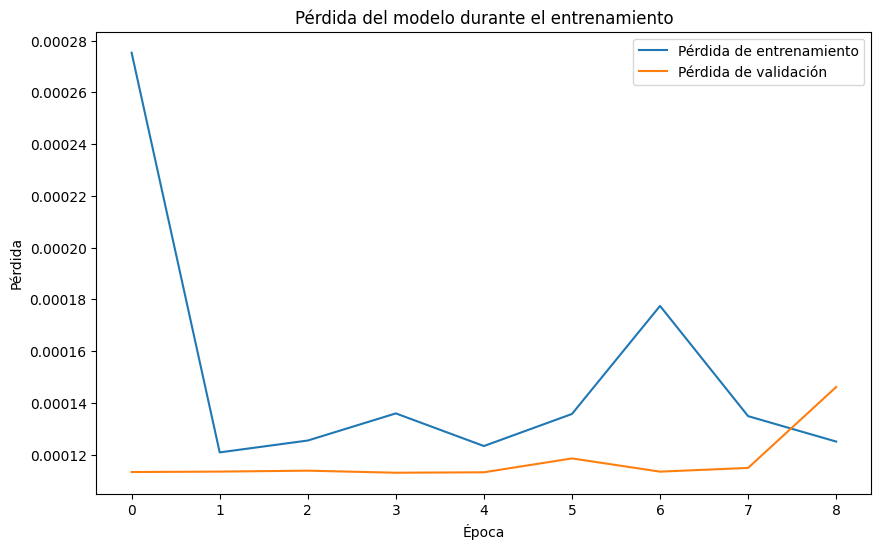

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt

# Asumiendo que df_completo es tu DataFrame original con las columnas 'Date' y 'Close'

def create_features(data, lag):
    df = pd.DataFrame(index=data.index)
    df['target'] = data['Close']
    for i in range(1, lag + 1):
        df[f'lag_{i}'] = data['Close'].shift(i)
    return df.dropna()

# Función para evaluar el modelo
def evaluate_model(model, X, y):
    predictions = model.predict(X).flatten()
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    return mse, r2, predictions

# Dividir los datos en entrenamiento, validación y prueba
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

n = len(df_completo)
train_size = int(n * train_ratio)
val_size = int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

# Buscar el mejor lag
best_lag = 0
best_val_mse = np.inf

for lag in range(1, 21):  # Probamos lags de 1 a 20
    # Crear características para train y validación
    train_features = create_features(train_data.set_index('Date'), lag)
    val_features = create_features(val_data.set_index('Date'), lag)
    
    # Separar características (X) y objetivo (y)
    X_train = train_features.drop('target', axis=1)
    y_train = train_features['target']
    X_val = val_features.drop('target', axis=1)
    y_val = val_features['target']
    
    # Normalizar los datos
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_train_scaled = scaler_X.fit_transform(X_train)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
    X_val_scaled = scaler_X.transform(X_val)
    y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
    
    # Crear un modelo simple para evaluar el lag
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val_scaled), verbose=0)
    
    # Evaluar el modelo
    val_mse, _, _ = evaluate_model(model, X_val_scaled, y_val_scaled)
    
    if val_mse < best_val_mse:
        best_val_mse = val_mse
        best_lag = lag

print(f"Mejor lag: {best_lag}")

# Crear características finales con el mejor lag
train_features = create_features(train_data.set_index('Date'), best_lag)
val_features = create_features(val_data.set_index('Date'), best_lag)
test_features = create_features(test_data.set_index('Date'), best_lag)

# Separar características (X) y objetivo (y)
X_train = train_features.drop('target', axis=1)
y_train = train_features['target']
X_val = val_features.drop('target', axis=1)
y_val = val_features['target']
X_test = test_features.drop('target', axis=1)
y_test = test_features['target']

# Normalizar los datos
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Definir el modelo con hiperparámetros ajustables
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Número de capas ocultas (2 o 3)
    n_layers = hp.Choice('n_layers', values=[2, 3])

    for i in range(n_layers):
        # Número de neuronas por capa (64 o 128)
        units = hp.Choice(f'units_{i}', values=[64, 128])
        # Función de activación (relu o tanh)
        activation = hp.Choice(f'activation_{i}', values=['relu', 'tanh'])
        
        model.add(layers.Dense(units=units, activation=activation))

    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mse')
    return model

# Configurar la búsqueda de hiperparámetros
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=2,
    directory='my_dir',
    project_name='NN_hyperparameters'
)

# Realizar la búsqueda
tuner.search(X_train_scaled, y_train_scaled, epochs=100, validation_data=(X_val_scaled, y_val_scaled), 
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Reentrenar el mejor modelo para obtener el historial de entrenamiento
history = best_model.fit(X_train_scaled, y_train_scaled, epochs=100, 
                         validation_data=(X_val_scaled, y_val_scaled), 
                         callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
                         verbose=0)

# Evaluar el modelo en los conjuntos de entrenamiento, validación y prueba
def evaluate_model_final(model, X, y, set_name):
    predictions = model.predict(X).flatten()
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)
    print(f"{set_name} - R2: {r2:.4f}, RMSE: {rmse:.4f}")
    return predictions

train_pred = evaluate_model_final(best_model, X_train_scaled, y_train_scaled, "Entrenamiento")
val_pred = evaluate_model_final(best_model, X_val_scaled, y_val_scaled, "Validación")
test_pred = evaluate_model_final(best_model, X_test_scaled, y_test_scaled, "Prueba")

# Desnormalizar las predicciones
train_pred = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).flatten()
val_pred = scaler_y.inverse_transform(val_pred.reshape(-1, 1)).flatten()
test_pred = scaler_y.inverse_transform(test_pred.reshape(-1, 1)).flatten()

# Imprimir los mejores hiperparámetros
best_hp = tuner.get_best_hyperparameters(1)[0]
print("\nMejores hiperparámetros:")
print(f"Número de capas ocultas: {best_hp.get('n_layers')}")
for i in range(best_hp.get('n_layers')):
    print(f"Capa {i+1}:")
    print(f"  Unidades: {best_hp.get(f'units_{i}')}")
    print(f"  Activación: {best_hp.get(f'activation_{i}')}")


# Visualizar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del modelo durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [40]:
date = test_data['Date'] + pd.DateOffset(days=best_lag)

plot_("Predicciones de la Serie Temporal",
      (test_data['Date'], test_data['Close'], "Datos de Prueba"),
      (date, test_pred, "Predicciones"))

In [41]:
mse_results_NN = {
    "Family": "Red Neuronal",
    "Model": "MLP",
    "MSE": mean_squared_error(y_test, test_pred)
}
mse_NN = pd.DataFrame(mse_results_NN, index=[0])
mse_NN

Family Model       MSE
0  Red Neuronal   MLP  0.390182

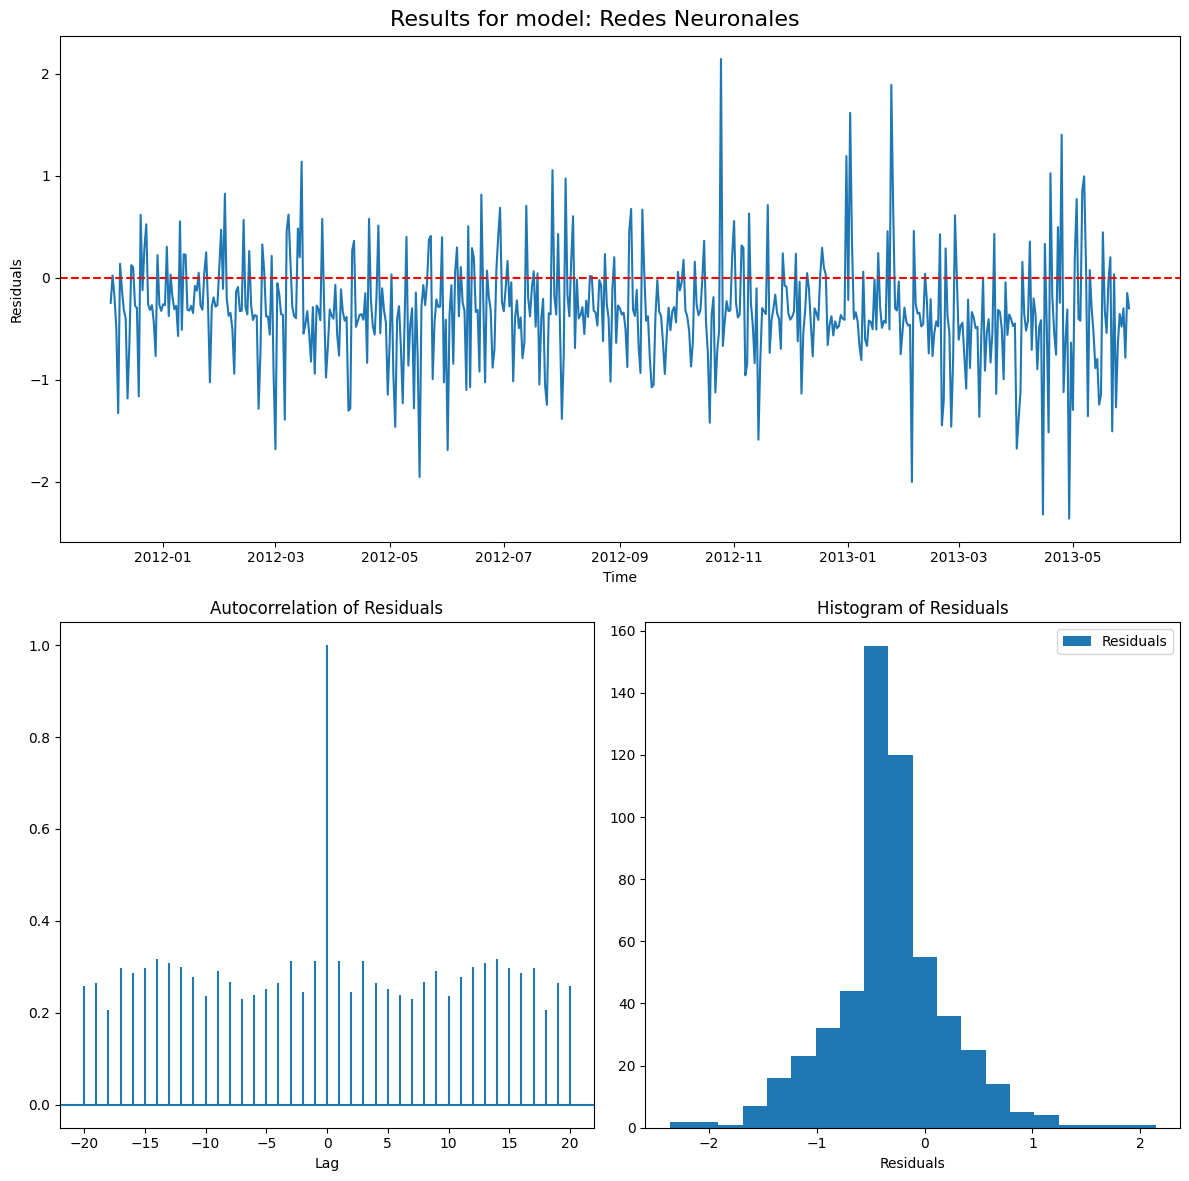

: 

In [42]:
residuals = y_test - test_pred

# Creación de la figura y subplots
fig, axs = plt.subplot_mosaic("AA;BC", figsize=(12, 12))

# Llamada a la función con la serie de residuos y el título del modelo
plot_residuals_and_stats(residuals, "Redes Neuronales", fig, axs)

# Mostrar la gráfica
plt.show()


## RNN

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt

# Assuming df_completo is your original DataFrame with 'Date' and 'Trend_Removed' columns

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Split the data into train, validation, and test sets
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15
n = len(df_completo)
train_size, val_size = int(n * train_ratio), int(n * val_ratio)

train_data = df_completo.iloc[:train_size]
val_data = df_completo.iloc[train_size:train_size+val_size]
test_data = df_completo.iloc[train_size+val_size:]

# Normalize the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Trend_Removed']])
val_scaled = scaler.transform(val_data[['Trend_Removed']])
test_scaled = scaler.transform(test_data[['Trend_Removed']])

# Create sequences
seq_length = 10
X_train, y_train = create_sequences(train_scaled, seq_length)
X_val, y_val = create_sequences(val_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Define the LSTM model with adjustable hyperparameters
def build_lstm_model(hp):
    model = keras.Sequential()
    
    # Number of LSTM layers (2 or 3)
    n_layers = hp.Choice('n_layers', values=[2, 3])
    
    for i in range(n_layers):
        # Number of units per layer (64 or 128)
        units = hp.Choice(f'units_{i}', values=[64, 128])
        # Activation function (tanh or relu)
        activation = hp.Choice(f'activation_{i}', values=['tanh', 'relu'])
        
        return_sequences = i < n_layers - 1  # True for all layers except the last
        
        if i == 0:
            model.add(layers.LSTM(units=units, activation=activation, return_sequences=return_sequences, input_shape=(seq_length, 1)))
        else:
            model.add(layers.LSTM(units=units, activation=activation, return_sequences=return_sequences))
    
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Define the GRU model with adjustable hyperparameters
def build_gru_model(hp):
    model = keras.Sequential()
    
    # Number of GRU layers (2 or 3)
    n_layers = hp.Choice('n_layers', values=[2, 3])
    
    for i in range(n_layers):
        # Number of units per layer (64 or 128)
        units = hp.Choice(f'units_{i}', values=[64, 128])
        # Activation function (tanh or relu)
        activation = hp.Choice(f'activation_{i}', values=['tanh', 'relu'])
        
        return_sequences = i < n_layers - 1  # True for all layers except the last
        
        if i == 0:
            model.add(layers.GRU(units=units, activation=activation, return_sequences=return_sequences, input_shape=(seq_length, 1)))
        else:
            model.add(layers.GRU(units=units, activation=activation, return_sequences=return_sequences))
    
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to perform hyperparameter tuning and training
def tune_and_train(build_model, model_name):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=25,
        executions_per_trial=2,
        directory='my_dir',
        project_name=f'{model_name}_hyperparameters'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), 
                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

    best_model = tuner.get_best_models(num_models=1)[0]
    
    history = best_model.fit(X_train, y_train, epochs=50, 
                             validation_data=(X_val, y_val), 
                             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
                             verbose=0)
    
    return best_model, tuner.get_best_hyperparameters(1)[0]

# Function to evaluate and plot results
def evaluate_and_plot(model, model_name):
    test_predictions = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, test_predictions)

    print(f"{model_name} - Test set - R2: {r2:.4f}, RMSE: {rmse:.4f}")

    test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    plt.figure(figsize=(12, 6))
    plt.plot(test_data['Date'].iloc[seq_length:], y_test_actual, label='Actual')
    plt.plot(test_data['Date'].iloc[seq_length:], test_predictions, label='Predicted')
    plt.title(f'{model_name} Model: Predictions vs Actual Values')
    plt.xlabel('Date')
    plt.ylabel('Trend_Removed')
    plt.legend()
    plt.show()

    return mse, y_test_actual, test_predictions

# Train and evaluate LSTM model
lstm_model, lstm_hp = tune_and_train(build_lstm_model, 'LSTM')
lstm_mse, lstm_actual, lstm_pred = evaluate_and_plot(lstm_model, 'LSTM')

print("\nBest LSTM Hyperparameters:")
print(f"Number of layers: {lstm_hp.get('n_layers')}")
for i in range(lstm_hp.get('n_layers')):
    print(f"Layer {i+1}:")
    print(f"  Units: {lstm_hp.get(f'units_{i}')}")
    print(f"  Activation: {lstm_hp.get(f'activation_{i}')}")
print(f"LSTM Mean Squared Error: {lstm_mse:.4f}")

# Train and evaluate GRU model
gru_model, gru_hp = tune_and_train(build_gru_model, 'GRU')
gru_mse, gru_actual, gru_pred = evaluate_and_plot(gru_model, 'GRU')

print("\nBest GRU Hyperparameters:")
print(f"Number of layers: {gru_hp.get('n_layers')}")
for i in range(gru_hp.get('n_layers')):
    print(f"Layer {i+1}:")
    print(f"  Units: {gru_hp.get(f'units_{i}')}")
    print(f"  Activation: {gru_hp.get(f'activation_{i}')}")
print(f"GRU Mean Squared Error: {gru_mse:.4f}")


Trial 5 Complete [00h 01m 38s]
val_loss: 0.002423624391667545

Best val_loss So Far: 0.002393221599049866
Total elapsed time: 00h 06m 40s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
2                 |2                 |n_layers
128               |64                |units_0
tanh              |relu              |activation_0
64                |128               |units_1
relu              |relu              |activation_1
64                |64                |units_2
tanh              |tanh              |activation_2

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0408 - val_loss: 0.0057
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 6/50
80/80 ━

In [ ]:
plot_("Predicciones de la Serie Temporal",
      (test_data['Date'], test_data['Trend_Removed'], "Datos de Prueba"),
      (test_data['Date'].iloc[seq_length:], lstm_pred, "Predicciones LSTM"),
      (test_data['Date'].iloc[seq_length:], gru_pred, "Predicciones GRU"))

In [ ]:
# Creación de la figura y subplots
fig, axs = plt.subplot_mosaic("AA;BC", figsize=(12, 12))

# Llamada a la función con la serie de residuos y el título del modelo
plot_residuals_and_stats(lstm_actual - lstm_pred, "LSTM", fig, axs)

# Mostrar la gráfica
plt.show()

In [ ]:
# Creación de la figura y subplots
fig, axs = plt.subplot_mosaic("AA;BC", figsize=(12, 12))

# Llamada a la función con la serie de residuos y el título del modelo
plot_residuals_and_stats(gru_actual - gru_pred, "GRU", fig, axs)

# Mostrar la gráfica
plt.show()

In [ ]:
mse_results_RNN = {
      "Family": "RNN",
      "Model": ["LSTM", "GRU"],
      "MSE": [lstm_mse, gru_mse]
}
mse_RNN = pd.DataFrame(mse_results_RNN).sort_values(by='MSE').reset_index(drop=True)
mse_RNN

Family Model       MSE
0    RNN   GRU  0.002208
1    RNN  LSTM  0.002256

# 5. Revision de MSE

In [ ]:
mse = pd.concat([mse_ETS, mse_tree, mse_NN, mse_RNN], ignore_index=True).sort_values(by='MSE').reset_index(drop=True)
mse

Family              Model       MSE
0                RNN                GRU  0.002208
1                RNN               LSTM  0.002256
2       Red Neuronal          NN-3capas  0.076838
3  Árbol de Decisión  Arbol de Decision  0.078681
4                ETS                AAd  0.273729
5                ETS                 AA  0.274045
6                ETS                 AM  0.274758